Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None

First few rows:
   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

Data types:
R&D Spend          float64
Administration     float64
Marketi

C:\Users\salil\AppData\Local\Temp\ipykernel_45796\2525292158.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dataset_clean = dataset.applymap(clean_data)


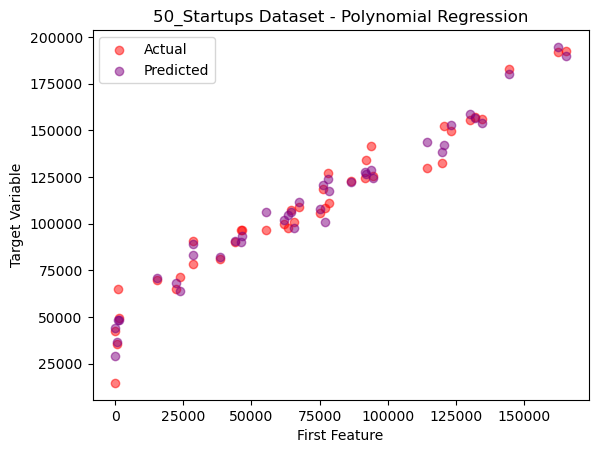

Test R-squared score: 0.4124242064554906


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

# Load the dataset
dataset = pd.read_csv('50_Startups.csv')

# Check for missing values and data types
print("Dataset info:")
print(dataset.info())
print("\nFirst few rows:")
print(dataset.head())
print("\nData types:")
print(dataset.dtypes)

# Function to clean data and extract numbers
def clean_data(value):
    if isinstance(value, str):
        # Remove non-numeric characters and extract numbers
        numbers = re.findall(r'\d+\.?\d*', value)
        return float(numbers[0]) if numbers else 0.0
    return float(value)

# Clean the dataset
dataset_clean = dataset.applymap(clean_data)

# Check cleaned data
print("\nCleaned dataset info:")
print(dataset_clean.info())
print("\nFirst few rows of cleaned data:")
print(dataset_clean.head())

# Prepare features and target
X = dataset_clean.iloc[:, :-1].values
y = dataset_clean.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Create and fit polynomial regression
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

# Make predictions
y_pred = regressor.predict(X_poly)

from sklearn.metrics import r2_score
r2 = r2_score(y_train, y_pred)
print(f"\nR-squared score: {r2}")

# Visualization (using first feature)
plt.scatter(X_train[:, 0], y_train, c='red', alpha=0.5)
plt.scatter(X_train[:, 0], y_pred, color='purple', alpha=0.5)
plt.title('50_Startups Dataset - Polynomial Regression')
plt.xlabel('First Feature')
plt.ylabel('Target Variable')
plt.legend(['Actual', 'Predicted'])
plt.show()

# Test set evaluation
X_test_poly = poly_reg.transform(X_test)
y_test_pred = regressor.predict(X_test_poly)
test_r2 = r2_score(y_test, y_test_pred)
print(f"Test R-squared score: {test_r2}")